In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../dados/The_Oscar_Award_Demographics_1928-2025 - The_Oscar_Award_Demographics_1928-2025_v3.csv')

| Objetivo           | Comando principal                         |
| ------------------ | ----------------------------------------- |
| Ver dados          | `df.head()`, `df.info()`, `df.describe()` |
| Selecionar colunas | `df['col']`, `df[['col1', 'col2']]`       |
| Filtrar linhas     | `df[df['col'] > 10]`                      |
| Ordenar            | `df.sort_values(by='col')`                |
| Valores nulos      | `df.isnull().sum()`, `df.fillna()`        |
| Agrupar/resumir    | `df.groupby('col').mean()`                |
| Contar             | `df['col'].value_counts()`                |
| Transformar        | `df['col'].apply(func)`                   |
| Mesclar datasets   | `pd.merge()`, `pd.concat()`               |
| Exportar/Importar  | `df.to_csv()`, `pd.read_csv()`            |

# Initial analysis

In [6]:
df.head()        

,Name,Category,Film,Win_Oscar?,Year_Ceremony,Birth_Date,Birth_Place,Gender,Race or Ethnicity,Sexual orientation,Religion,Link
0,Richard Barthelmess,ACTOR,The Noose,False,1928,1895-05-09,New York City,Male,White,Straight,Na,http://www.nndb.com/people/137/000068930/
1,Emil Jannings,ACTOR,The Last Command,True,1928,1884-07-23,"Rorschach, Switzerland",Male,White,Bisexual,Na,/people/738/000063549/
2,Louise Dresser,ACTRESS,A Ship Comes In,False,1928,1878-10-05,"Evansville, ID",Female,White,Straight,Na,https://www.imdb.com/fr/name/nm0237571/
3,Janet Gaynor,ACTRESS,7th Heaven,True,1928,1906-10-06,"Philadelphia, PA",Female,White,Straight,Na,/people/129/000043000/
4,Gloria Swanson,ACTRESS,Sadie Thompson,False,1928,1897-03-27,"Chicago, IL",Female,White,Straight,Na,http://www.nndb.com/people/979/000043850/


In [7]:
lines, columns = df.shape
print(f'Número de linhas: {lines}')
print(f'Número de colunas: {columns}')

Número de linhas: 2331
Número de colunas: 12


In [8]:
# Checking for last year ceremony of the dataset
df.sort_values(by='Year_Ceremony', ascending=False).head(5)

,Name,Category,Film,Win_Oscar?,Year_Ceremony,Birth_Date,Birth_Place,Gender,Race or Ethnicity,Sexual orientation,Religion,Link
2310,Sebastian Stan,ACTOR,The Apprentice,False,2025,1983-08-13,"Constanta, Romania",Male,White,Straight,Na,http://www.nndb.com/people/879/000347835/
2330,Coralie Fargeat,DIRECTING,The Substance,False,2025,1976-11-24,NaN,Female,White,Na,Na,https://www.imdb.com/fr/name/nm0267287/
2329,Jacques Audiard,DIRECTING,Emilia Pérez,False,2025,1952-04-30,"Paris, France",Male,White,Na,Na,http://www.nndb.com/people/230/000213588/
2328,James Mangold,DIRECTING,A Complete Unknown,False,2025,1963-12-16,New York City,Male,White,Straight,Na,http://www.nndb.com/people/463/000163971/
2317,Cynthia Erivo,ACTRESS,Wicked,False,2025,1987-01-08,NaN,Female,Black,Straight,Roman Catholic,https://www.imdb.com/fr/name/nm7248827/


In [9]:
# Checking how many Na values are in the dataset, instead of NaN
(df == 'Na').sum().sum()

# Converting 'Na' to NaN
df.replace('Na', np.nan, inplace=True)

In [10]:
# Checking for missing values
df.isnull().sum()

Name                     0
Category                 0
Film                     0
Win_Oscar?               0
Year_Ceremony            0
Birth_Date               0
Birth_Place             53
Gender                   0
Race or Ethnicity        4
Sexual orientation     143
Religion              1535
Link                     0
dtype: int64

In [11]:
# Checking what are the categories in the dataset
df['Category'].value_counts()

Category
DIRECTING                       483
ACTRESS                         481
ACTOR                           477
ACTOR IN A SUPPORTING ROLE      445
ACTRESS IN A SUPPORTING ROLE    445
Name: count, dtype: int64

How did the Gender of winning directors changed through time? 

In [12]:
# Filtering by directors who won an Oscar
df_winning_directors = df[
    (df['Category'] == 'DIRECTING') &
    (df['Win_Oscar?'] == True)
]

In [13]:
# Checks how many Men and Women have won the Oscar for Best Director
gender_directors = df_winning_directors['Gender'].value_counts()

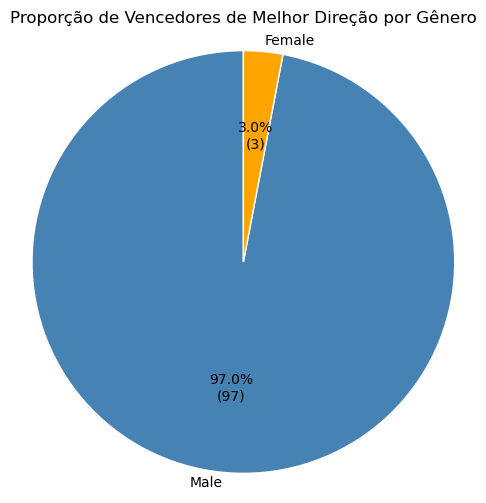

In [14]:
plt.figure(figsize=(6, 6))
total = gender_directors.sum() 
plt.pie(
    gender_directors,
    labels=gender_directors.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*total/100)})',
    colors=['steelblue', 'orange'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    labeldistance=1.05  # afasta os rótulos do centro do gráfico
)

plt.title("Proporção de Vencedores de Melhor Direção por Gênero")
plt.axis('equal')  # deixa o gráfico redondinho
plt.show()

In [15]:
df_year_gender = df_winning_directors.groupby(['Year_Ceremony', 'Gender']).size().unstack(fill_value=0)

In [16]:
df_year_gender.sort_values(by='Year_Ceremony', ascending=False).head()

Gender,Female,Male
Year_Ceremony,,
2025,0,1
2024,0,1
2023,0,1
2022,1,0
2021,1,0


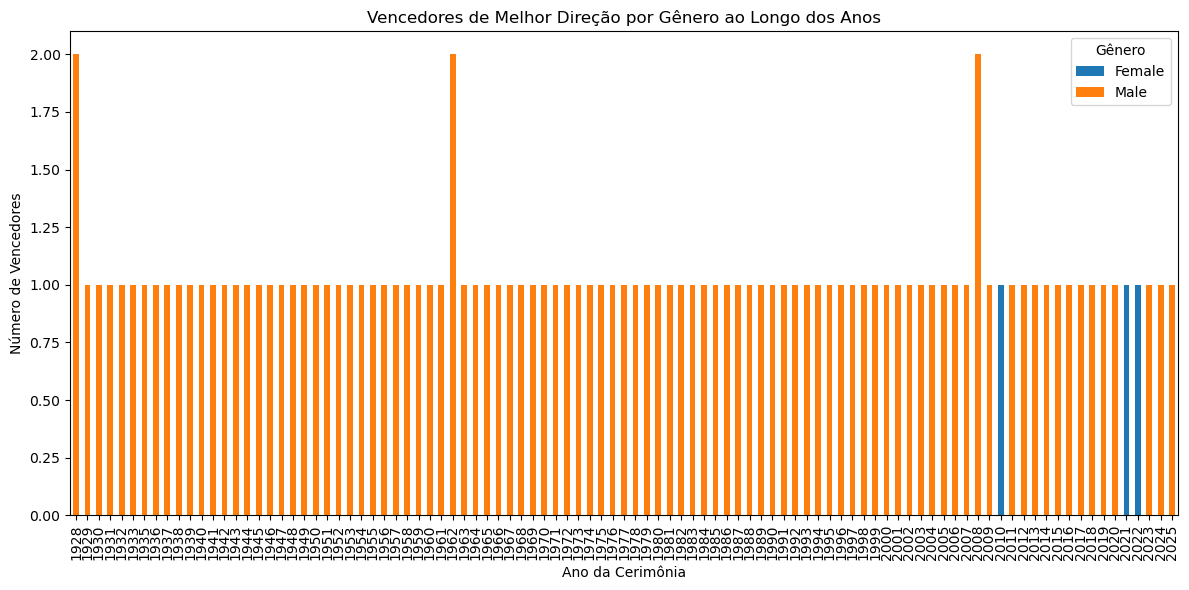

In [17]:
# Visualizing the data
import matplotlib.pyplot as plt

df_year_gender.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Vencedores de Melhor Direção por Gênero ao Longo dos Anos")
plt.xlabel("Ano da Cerimônia")
plt.ylabel("Número de Vencedores")
plt.legend(title="Gênero")
plt.tight_layout()
plt.show()

In [18]:
# Checking lines where the data says that two directors won the Oscar in the same year
df_winning_directors[df_winning_directors['Year_Ceremony'] == 1928] # This year had two winners for Best Director because it was divided into two categories: Best Director (Comedy) and Best Director (Drama).
df_winning_directors[df_winning_directors['Year_Ceremony'] == 1962] # This year had two winners for Best Director because 'West Side Story' was directed by two people, Jerome Robbins and Robert Wise (first time this happened)
df_winning_directors[df_winning_directors['Year_Ceremony'] == 2008] # This year had two winners for Best Director because 'No Country for Old Men' was directed by two people, Joel and Ethan Coen.

,Name,Category,Film,Win_Oscar?,Year_Ceremony,Birth_Date,Birth_Place,Gender,Race or Ethnicity,Sexual orientation,Religion,Link
1902,Ethan Coen,DIRECTING,No Country for Old Men,True,2008,1957-09-21,"St. Louis Park, MN",Male,White,Straight,Jewish,/people/400/000025325/
1903,Joel Coen,DIRECTING,No Country for Old Men,True,2008,1954-11-29,"St. Louis Park, MN",Male,White,Straight,Jewish,/people/399/000025324/
